## Imports and Read Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df = pd.read_csv("playoff_data.csv", index_col=False)
# increase index to start with 1 - now represents Super Bowl number
vikings_away = df.loc[df["Away"] == "Minnesota Vikings"]
vikings_home = df.loc[df["Home"] == "Minnesota Vikings"]
vikings = vikings_away.append(vikings_home)
vikings.index = range(1,len(vikings)+1)
vikings.head(1)

,Away,Home,Away Q1,Away Q2,Away Q3,Away Q4,Home Q1,Home Q2,Home Q3,Home Q4
1,Minnesota Vikings,Baltimore Colts,0,0,0,4,0,7,1,4


In [3]:
vikings.tail(1)

,Away,Home,Away Q1,Away Q2,Away Q3,Away Q4,Home Q1,Home Q2,Home Q3,Home Q4
51,New Orleans Saints,Minnesota Vikings,0,0,7,4,0,7,7,9


In [4]:
def changeVikings(data):
    vikes = "Minnesota Vikings"
    for i in range(len(vikings)):
        if(data['Home'].iloc[i] == vikes): 
            # change names
            data["Home"].iloc[i] = data["Away"].iloc[i]
            data["Away"].iloc[i] = vikes
            # change values for each quarter
            q1 = data["Away Q1"].iloc[i]
            data["Away Q1"].iloc[i] = data["Home Q1"].iloc[i]
            data["Home Q1"].iloc[i] = q1
            
            q2 = data["Away Q2"].iloc[i]
            data["Away Q2"].iloc[i] = data["Home Q2"].iloc[i]
            data["Home Q2"].iloc[i] = q2
            
            q3 = data["Away Q3"].iloc[i]
            data["Away Q3"].iloc[i] = data["Home Q3"].iloc[i]
            data["Home Q3"].iloc[i] = q3
            
            q4 = data["Away Q4"].iloc[i]
            data["Away Q4"].iloc[i] = data["Home Q4"].iloc[i]
            data["Home Q4"].iloc[i] = q4
    
    # rename columns
    data.rename(columns={"Away":"Minnesota Vikings", "Home": "Other", 
                         "Away Q1": "Vikes Q1", "Home Q1": "Other Q1",
                        "Away Q2": "Vikes Q2", "Home Q2": "Other Q2",
                        "Away Q3": "Vikes Q3", "Home Q3": "Other Q3",
                        "Away Q4": "Vikes Q4", "Home Q4": "Other Q4",}, inplace=True)
    return data

In [5]:
final_df = changeVikings(vikings)
final_df.head(1)

,Minnesota Vikings,Other,Vikes Q1,Vikes Q2,Vikes Q3,Vikes Q4,Other Q1,Other Q2,Other Q3,Other Q4
1,Minnesota Vikings,Baltimore Colts,0,0,0,4,0,7,1,4


In [6]:
final_df.tail(1)

,Minnesota Vikings,Other,Vikes Q1,Vikes Q2,Vikes Q3,Vikes Q4,Other Q1,Other Q2,Other Q3,Other Q4
51,Minnesota Vikings,New Orleans Saints,0,7,7,9,0,0,7,4


## Create Boards - Vikings on x-axis, Other teams on y-axis

In [7]:
# create empty board for each quarter
q1_sum = pd.DataFrame(0, index=range(10), columns=range(10))
q2_sum = pd.DataFrame(0, index=range(10), columns=range(10))
q3_sum = pd.DataFrame(0, index=range(10), columns=range(10))
q4_sum = pd.DataFrame(0, index=range(10), columns=range(10))

# populate quarter summary dataFrames and total summary df
for i in range(len(final_df)):
    q1_sum[final_df["Vikes Q1"].iloc[i]][final_df["Other Q1"].iloc[i]] += 1
    q2_sum[final_df["Vikes Q2"].iloc[i]][final_df["Other Q2"].iloc[i]] += 1
    q3_sum[final_df["Vikes Q3"].iloc[i]][final_df["Other Q3"].iloc[i]] += 1
    q4_sum[final_df["Vikes Q4"].iloc[i]][final_df["Other Q4"].iloc[i]] += 1

total_sum = (q1_sum + q2_sum + q3_sum + q4_sum)   

## How many squares have not won by quarter

In [8]:
q1_zeroes = ((q1_sum == 0).sum()).sum()
q2_zeroes = ((q2_sum == 0).sum()).sum()
q3_zeroes = ((q3_sum == 0).sum()).sum()
q4_zeroes = ((q4_sum == 0).sum()).sum()
zeroes = ((total_sum == 0).sum()).sum()

print(f"{q1_zeroes} squares have never won a single quarter")
print(f"{q2_zeroes} squares have never won a second quarter")
print(f"{q3_zeroes} squares have never won a third quarter")
print(f"{q4_zeroes} squares have never won a fourth quarter")
print(f"{zeroes} squares have never won any quarter")

85 squares have never won a single quarter
76 squares have never won a second quarter
71 squares have never won a third quarter
66 squares have never won a fourth quarter
49 squares have never won any quarter


## Which squares have never won any quarter?

<AxesSubplot:>

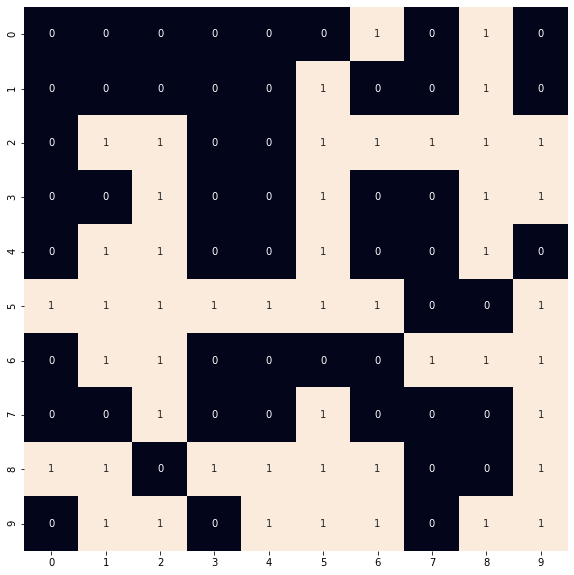

In [9]:
zero_sum = pd.DataFrame(0, index=range(10), columns=range(10))
for i in range(10):
    for j in range(10):
        if(total_sum[i][j] == 0):
            zero_sum[i][j] += 1

# show heatmap - 1 represents winless squares
plt.figure(figsize = (10,10))
sns.heatmap(zero_sum, annot=True, square=True, cbar=False)

## Which squares have never won by quarter?

<AxesSubplot:>

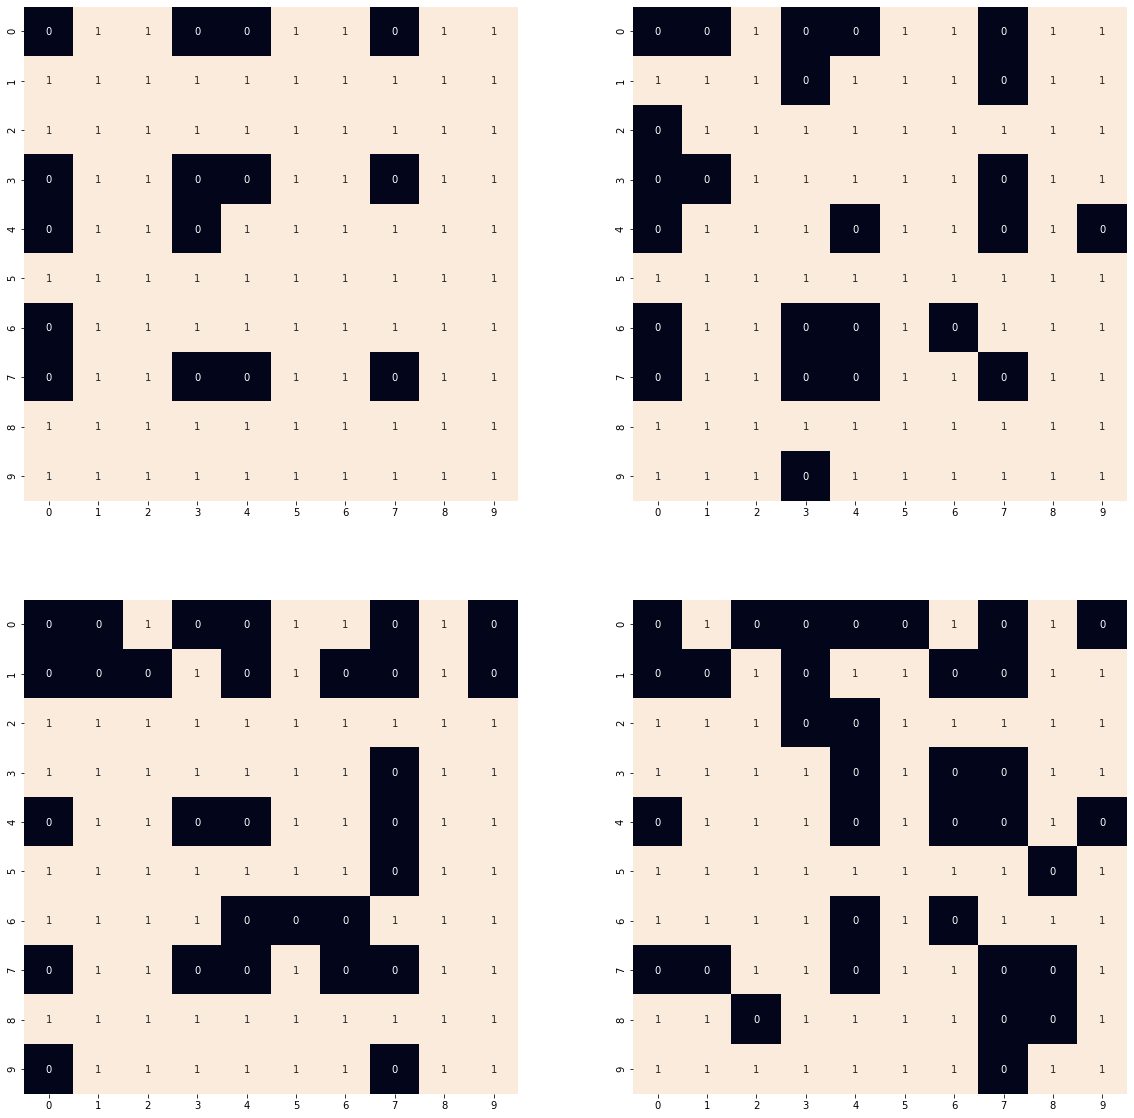

In [10]:
q1_zero_sum = pd.DataFrame(0, index=range(10), columns=range(10))
q2_zero_sum = pd.DataFrame(0, index=range(10), columns=range(10))
q3_zero_sum = pd.DataFrame(0, index=range(10), columns=range(10))
q4_zero_sum = pd.DataFrame(0, index=range(10), columns=range(10))
for i in range(10):
    for j in range(10):
        if(q1_sum[i][j] == 0):
            q1_zero_sum[i][j] += 1
        if(q2_sum[i][j] == 0):
            q2_zero_sum[i][j] += 1
        if(q3_sum[i][j] == 0):
            q3_zero_sum[i][j] += 1
        if(q4_sum[i][j] == 0):
            q4_zero_sum[i][j] += 1
            
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(20,20))
sns.heatmap(q1_zero_sum, ax=ax1, annot=True, square=True, cbar=False)
sns.heatmap(q2_zero_sum, ax=ax2, annot=True, square=True, cbar=False)
sns.heatmap(q3_zero_sum, ax=ax3, annot=True, square=True, cbar=False)
sns.heatmap(q4_zero_sum, ax=ax4, annot=True, square=True, cbar=False)

## How many squares have an above average expected value?
**Assuming \$5 per square with 25\% percent payout at the end of each quarter**

14 squares have an above average expected value
The sum of their expected values is: $350.49, which is 70.1% of the total winnings


<AxesSubplot:>

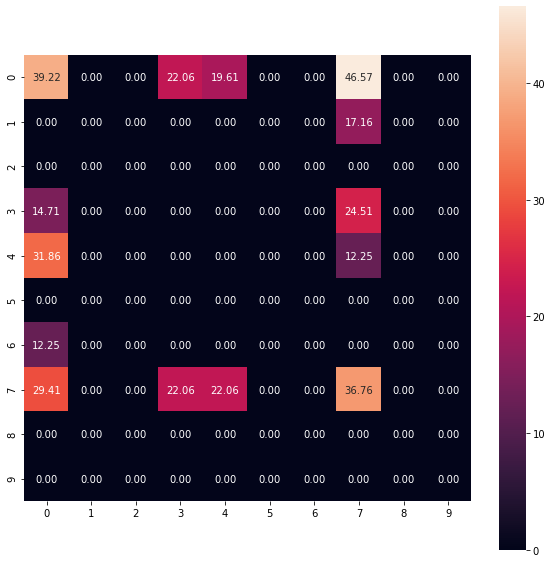

In [11]:
# ev = (occurance/total_occurances)*payout
q1_ev = q1_sum/len(final_df) * 125
q2_ev = q2_sum/len(final_df) * 125
q3_ev = q3_sum/len(final_df) * 125
q4_ev = q4_sum/len(final_df) * 125
total_ev = q1_ev + q2_ev + q3_ev + q4_ev

above_avg_by_col = (total_ev > 10).sum()
above_avg = above_avg_by_col.sum()
print(f"{above_avg} squares have an above average expected value")  

count = 0
above_avg_df = pd.DataFrame(0.0, index=range(10), columns=range(10))
for i in range(10):
    for j in range(10):
        if(total_ev[i][j] > 10):
            above_avg_df[i][j] += total_ev[i][j]
            count += total_ev[i][j]
            
count_percent = round(100*count/500,2)
print(f"The sum of their expected values is: ${round(count,2)}, which is {count_percent}% of the total winnings")

plt.figure(figsize = (10,10))
sns.heatmap(above_avg_df, annot=True, square=True, fmt='.2f')

## Number of occurances by quarter
Top left: 1st Quarter------Top right: 2nd Quarter  
Bottom left: 3rd Quarter------Bottom right: 4th quarter  

<AxesSubplot:>

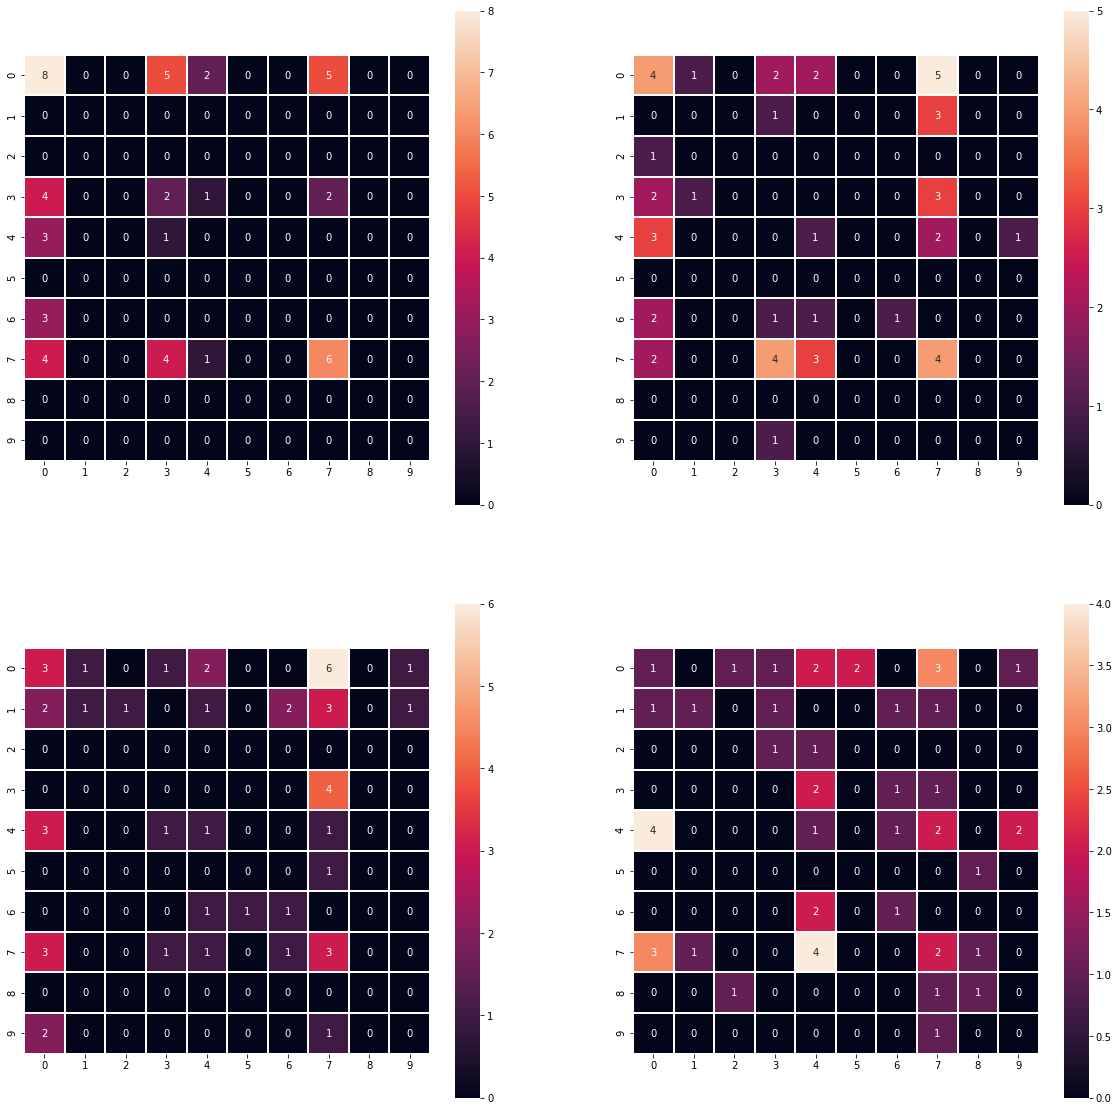

In [12]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(20,20))
sns.heatmap(q1_sum, ax=ax1, annot=True, linewidth=1, linecolor='w', square=True, fmt='.3g')
sns.heatmap(q2_sum, ax=ax2, annot=True, linewidth=1, linecolor='w', square=True)
sns.heatmap(q3_sum, ax=ax3, annot=True, linewidth=1, linecolor='w', square=True)
sns.heatmap(q4_sum, ax=ax4, annot=True, linewidth=1, linecolor='w', square=True)

## Overall number of occurances

<AxesSubplot:>

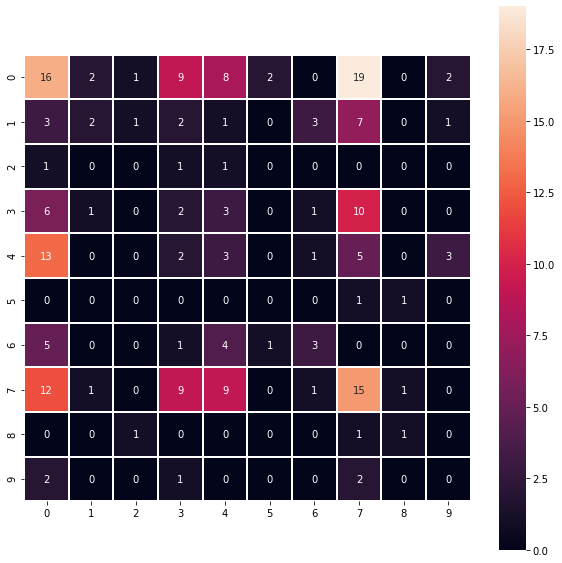

In [13]:
fig, ax = plt.subplots(1, figsize=(10,10))
sns.heatmap(total_sum, ax=ax, annot=True, linewidth=1, linecolor='w', square=True, fmt='.3g')

## Expected values for individual quarters

<AxesSubplot:>

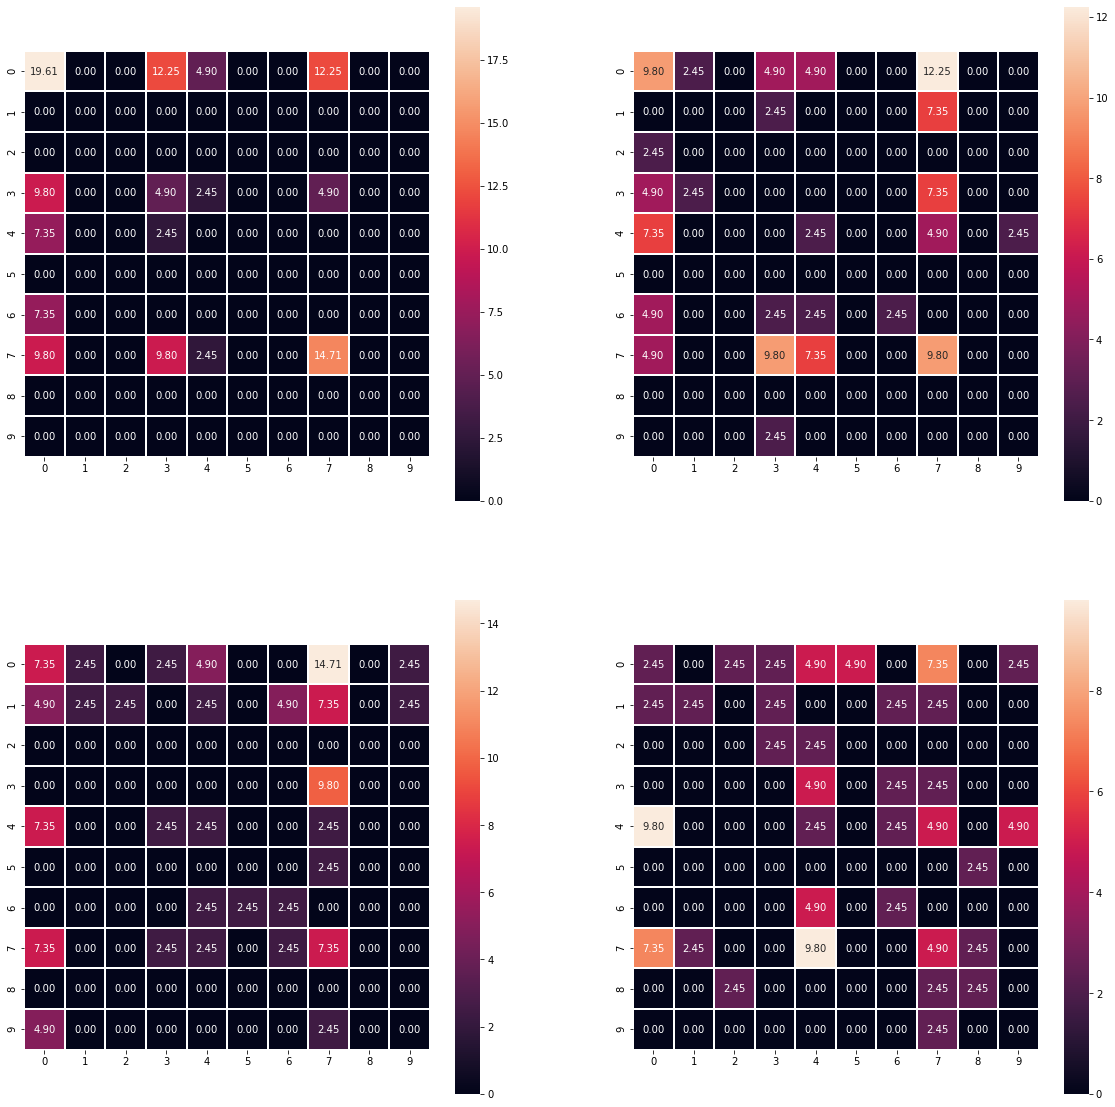

In [14]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(20,20))
sns.heatmap(q1_ev, ax=ax1, annot=True, linewidth=1, linecolor='w', square=True, fmt='.2f')
sns.heatmap(q2_ev, ax=ax2, annot=True, linewidth=1, linecolor='w', square=True, fmt='.2f')
sns.heatmap(q3_ev, ax=ax3, annot=True, linewidth=1, linecolor='w', square=True, fmt='.2f')
sns.heatmap(q4_ev, ax=ax4, annot=True, linewidth=1, linecolor='w', square=True, fmt='.2f')

## Overall expected values

<AxesSubplot:>

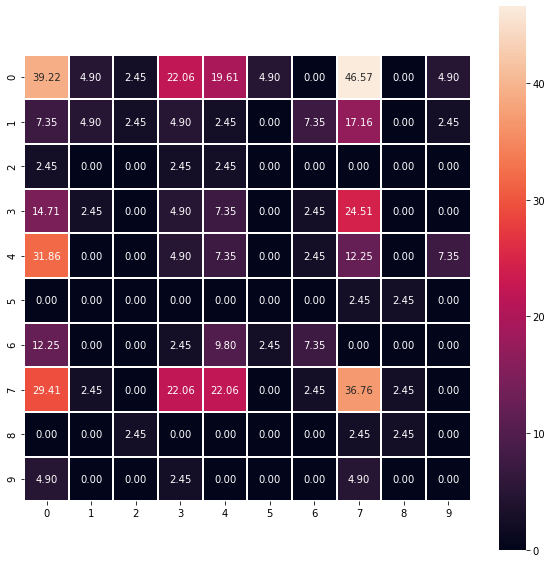

In [15]:
fig2, ax5 = plt.subplots(1, figsize=(10,10))
sns.heatmap(total_ev, ax=ax5, annot=True, linewidth=1, linecolor='w', square=True, fmt='.2f')

## Is it better to have a square with a 0 for Home or 0 for Away?

In [16]:
home_zero_ev = total_ev[0].sum()
away_zero_ev = total_ev.iloc[0].sum()
diff = home_zero_ev - away_zero_ev 
if(diff > 0):
    print(f"Home 0 had an expected value {round(diff,2)} higher than Away 0")
else:
    print(f"Away 0 had an expected value {round(-1*diff,2)} higher than Home 0")

Away 0 had an expected value 2.45 higher than Home 0


## What about every individual number?

In [17]:
for i in range(10):
    home_ev = total_ev[i].sum()
    away_ev = total_ev.iloc[i].sum()
    diff = home_ev - away_ev
    if(diff > 0):
        print(f"Home {i} had an expected value {round(diff,2)} higher than Away {i}")
    else:
        print(f"Away {i} had an expected value {round(-1*diff,2)} higher than Home {i}")

Away 0 had an expected value 2.45 higher than Home 0
Away 1 had an expected value 34.31 higher than Home 1
Away 2 had an expected value -0.0 higher than Home 2
Home 3 had an expected value 9.8 higher than Away 3
Home 4 had an expected value 4.9 higher than Away 4
Home 5 had an expected value 2.45 higher than Away 5
Away 6 had an expected value 12.25 higher than Home 6
Home 7 had an expected value 29.41 higher than Away 7
Away 8 had an expected value -0.0 higher than Home 8
Home 9 had an expected value 2.45 higher than Away 9
